In [ ]:
!wget https://raw.githubusercontent.com/harsha711/sensitive-content-classification/main/text_dataset/annotation_results.csv
!pip install scikeras

--2023-03-04 08:36:38--  https://raw.githubusercontent.com/harsha711/sensitive-content-classification/main/text_dataset/annotation_results.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 952650 (930K) [text/plain]
Saving to: ‘annotation_results.csv’

annotation_results. 100%[===================>] 930.32K  --.-KB/s    in 0.005s  

2023-03-04 08:36:38 (167 MB/s) - ‘annotation_results.csv’ saved [952650/952650]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support


In [ ]:
df = pd.read_csv("annotation_results.csv", index_col='uri')
df.head()

,text,Incomprensibile,Non sensibile,Non so,Sensibile
uri,,,,,
0,likes the sound of thunder.,0,2,0,1
1,is so sleepy it's not even funny that's she ca...,0,1,0,2
2,is sore and wants the knot of muscles at the b...,0,0,0,3
3,likes how the day sounds in this new song.,0,2,1,0
4,is home. <3,0,0,0,3


In [ ]:
df["class"] = np.where(df["Sensibile"]>=2, 1, 0)
df.head()

,text,Incomprensibile,Non sensibile,Non so,Sensibile,class
uri,,,,,,
0,likes the sound of thunder.,0,2,0,1,0
1,is so sleepy it's not even funny that's she ca...,0,1,0,2,1
2,is sore and wants the knot of muscles at the b...,0,0,0,3,1
3,likes how the day sounds in this new song.,0,2,1,0,0
4,is home. <3,0,0,0,3,1


# Text Cleaning

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
stop_words = stopwords.words("english")
replacing_value = len(string.punctuation) * ' '

In [ ]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [ ]:
contractions = contraction_mapping

#initialize stop words and LancasterStemmer
stop_words=set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
def text_cleaning(x, remove_emojis=True, remove_stop_words=True):
    """Apply function to a clean a tweet"""
    x = x.lower().strip()
    # romove urls
    # url = re.compile(r'https?://\S+|www\.\S+')
    # x = url.sub(r'',x)
    # remove html tags
    html = re.compile(r'<.*?>')
    x = html.sub(r'',x)
    #contractions
    x = ' '.join([contraction_mapping[w] if w in contraction_mapping else w for w in x.split(' ') ])
    #print(temp)
    # remove punctuation
    replacing_value = len(string.punctuation) * ' '
    operator = str.maketrans(string.punctuation, replacing_value) #????
    x = x.translate(operator)
    #x = re.sub(r'[^\w\s]', '', x)
    x = x.rstrip()
    if remove_emojis:
        x = x.encode('ascii', 'ignore').decode('utf8').strip()
    if remove_stop_words:
        x = ' '.join([lemmatizer.lemmatize(word) for word in x.split(' ') if word not in stop_words])
    return x

In [ ]:
df['cleaned_text'] = df['text'].apply(text_cleaning)

In [ ]:
df['cleaned_text'].isnull().values.any()

False

In [ ]:
df['cleaned_text'].isna().sum()

0

In [ ]:
df

,text,Incomprensibile,Non sensibile,Non so,Sensibile,class,cleaned_text
uri,,,,,,,
0,likes the sound of thunder.,0,2,0,1,0,like sound thunder
1,is so sleepy it's not even funny that's she ca...,0,1,0,2,1,sleepy even funny cannot get sleep
2,is sore and wants the knot of muscles at the b...,0,0,0,3,1,sore want knot muscle base neck stop hurting ...
3,likes how the day sounds in this new song.,0,2,1,0,0,like day sound new song
4,is home. <3,0,0,0,3,1,home 3
...,...,...,...,...,...,...,...
9912,little things give you away.,0,2,1,0,0,little thing give away
9913,is wishing it was Saturday.,0,3,0,0,0,wishing saturday
9914,is studying hard for the G.R.E.,0,2,1,0,0,studying hard g r e


In [ ]:
df = df.sample(frac=1, random_state=42)

In [ ]:
df

,text,Incomprensibile,Non sensibile,Non so,Sensibile,class,cleaned_text
uri,,,,,,,
6556,had a really really good day,0,2,0,1,0,really really good day
9285,"Finally, a three day weekend to.... catch up w...",0,1,0,2,1,finally three day weekend catch school
360,How do i change my name??,0,3,0,0,0,change name
1261,had everything go wrong for dinner tonight but...,0,1,0,2,1,everything go wrong dinner tonight ended exact...
3038,Thinks that chrome has come a long way since t...,0,3,0,0,0,think chrome come long way since first time tr...
...,...,...,...,...,...,...,...
5734,Snow in Germany!,0,2,1,0,0,snow germany
5191,just saw a commercial for Rihanna's 20//20 int...,0,2,1,0,0,saw commercial rihanna 20 20 interview ordeal...
5390,is sick?,0,0,1,2,1,sick


In [ ]:
# is_NaN = df.isnull()
# row_has_NaN = is_NaN.any(axis=1)
# rows_with_NaN = df[row_has_NaN]
# print(rows_with_NaN)

In [ ]:
# df = df.dropna(subset=['text'])
# df.isnull().values.any()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.constraints import unit_norm
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense, Input, Conv1D, MaxPooling1D, GlobalMaxPooling1D, GRU, Bidirectional
from tensorflow.keras import Sequential, Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Tokenization

In [ ]:
max_text_len = 0
# for text in df["text"].head():
#   print(len(text.split()))
for text in df["cleaned_text"]:
  # if type(text) == float:
  #   print(text)
  text = str(text)
  max_text_len = max(len(text.split()), max_text_len)
print(max_text_len)

66


In [ ]:
size = df.shape[0]
size

9917

In [ ]:
vocab_size = 10000
oov_tok = "<OOV>"
max_length = max_text_len
maxlen= max_text_len
trunc_type="post"
padding_type="post"
training_size = int(0.75 * size)
embedding_dim = 100 #50

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df["cleaned_text"], df["class"], test_size=0.15, stratify=df["class"],random_state = 7)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, stratify=y_train,random_state = 7)

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size,
                      oov_token = oov_tok)

In [ ]:
tokenizer.fit_on_texts(X_train)

words_to_index = tokenizer.word_index
print(dict(list(words_to_index.items())[:10]))
print(len(words_to_index))

{'<OOV>': 1, 'propname': 2, 'day': 3, 'like': 4, 'get': 5, 'one': 6, 'time': 7, 'go': 8, 'going': 9, 'today': 10}
11480


# Defining Glove Function and parameters

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def read_glove_vector(glove_vec):
  with open(glove_vec, 'r', encoding='UTF-8') as f:
    words = set()
    word_to_vec_map = {}
    for line in f:
      w_line = line.split()
      curr_word = w_line[0]
      word_to_vec_map[curr_word] = np.array(w_line[1:], dtype=np.float64)



  return word_to_vec_map

In [ ]:
word_to_vec_map = read_glove_vector('/content/drive/My Drive/capstone/glove/glove.twitter.27B.50d.txt')

In [ ]:
vocab_len = vocab_size
embed_vector_len = word_to_vec_map['password'].shape[0]

emb_matrix = np.zeros((vocab_len, embed_vector_len))


for word, index in words_to_index.items():
  embedding_vector = word_to_vec_map.get(word)
  if embedding_vector is not None and index < vocab_len:
    emb_matrix[index, :] = embedding_vector

embedding_layer = Embedding(input_dim=vocab_len,
                            output_dim=embed_vector_len,
                            input_length=max_text_len,
                            weights = [emb_matrix],
                            trainable=False)

In [ ]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(X_train_sequences,
                                maxlen=maxlen,
                                padding=padding_type,
                                truncating = trunc_type)

X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sequences,
                                maxlen=maxlen,
                                padding=padding_type,
                                truncating = trunc_type)

X_val_sequences = tokenizer.texts_to_sequences(X_val)
X_val_padded = pad_sequences(X_val_sequences,
                                maxlen=maxlen,
                                padding=padding_type,
                                truncating = trunc_type)

In [ ]:
# print(X_train_padded.shape, X_test_padded.shape)
# X_total_padded = np.concatenate((X_train_padded, X_test_padded))
# X_total_padded.shape

In [ ]:
# y_total = np.concatenate((y_train, y_test))
# y_total.shape

# LSTM model on pretrained Glove Model dataset

In [ ]:
def lstm_model(input_shape):
  X_indices = Input(input_shape)

  embeddings = embedding_layer(X_indices)

  X = Bidirectional(LSTM(128, return_sequences=True))(embeddings)

  X = Dropout(0.6)(X)

  #X = LSTM(128, return_sequences=True)(X)

  #X = Dropout(0.6)(X)

  X = Bidirectional(LSTM(128))(X)

  #X = Dropout(0.6)(X)

  X = Dense(1, activation='sigmoid')(X)

  model = Model(inputs=X_indices, outputs=X)

  return model

In [ ]:
model_lstm = lstm_model((max_text_len,))
model_lstm.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 66)]              0         
                                                                 
 embedding (Embedding)       (None, 66, 50)            500000    
                                                                 
 bidirectional_4 (Bidirectio  (None, 66, 256)          183296    
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 66, 256)           0         
                                                                 
 bidirectional_5 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 1)                 257 

In [ ]:
earlyStopping = EarlyStopping(monitor='val_accuracy', patience=15, verbose=0, mode='max')
reduce_lr_acc = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=5, verbose=1, min_delta=1e-6, mode='max')

In [ ]:
model_lstm.compile(optimizer="adam",
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [ ]:
num_epochs = 50
history_lstm = model_lstm.fit(X_train_padded,
                    y_train,
                    epochs=num_epochs,
                    validation_data=(X_test_padded, y_test),
                    callbacks=[reduce_lr_acc, earlyStopping]
                    )

Epoch 1/50
224/224 [==============================] - 15s 31ms/step - loss: 0.5533 - accuracy: 0.7228 - val_loss: 0.4854 - val_accuracy: 0.7581 - lr: 0.0010
Epoch 2/50
224/224 [==============================] - 4s 17ms/step - loss: 0.5171 - accuracy: 0.7503 - val_loss: 0.4982 - val_accuracy: 0.7440 - lr: 0.0010
Epoch 3/50
224/224 [==============================] - 4s 20ms/step - loss: 0.5018 - accuracy: 0.7585 - val_loss: 0.4792 - val_accuracy: 0.7708 - lr: 0.0010
Epoch 4/50
224/224 [==============================] - 5s 21ms/step - loss: 0.4879 - accuracy: 0.7666 - val_loss: 0.4758 - val_accuracy: 0.7688 - lr: 0.0010
Epoch 5/50
224/224 [==============================] - 4s 17ms/step - loss: 0.4737 - accuracy: 0.7768 - val_loss: 0.4658 - val_accuracy: 0.7823 - lr: 0.0010
Epoch 6/50
224/224 [==============================] - 4s 18ms/step - loss: 0.4603 - accuracy: 0.7842 - val_loss: 0.4764 - val_accuracy: 0.7735 - lr: 0.0010
Epoch 7/50
224/224 [==============================] - 5s 22ms/s

In [ ]:
name="history_lstm.txt"
with open(name, 'w+') as f:
  for value in history_lstm.history["accuracy"]:
    f.write(str(value))
    f.write("\n")
  f.write("\n")
  for value in history_lstm.history["val_accuracy"]:
    f.write(str(value))
    f.write("\n")
  f.write("\n")
  for value in history_lstm.history["loss"]:
    f.write(str(value))
    f.write("\n")
  f.write("\n")
  for value in history_lstm.history["val_loss"]:
    f.write(str(value))
    f.write("\n")
  f.write("\n")

f.close()



In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()


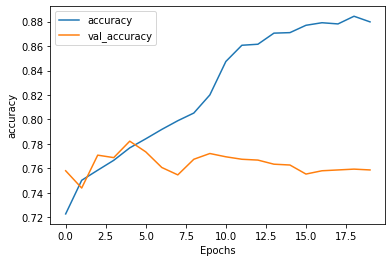

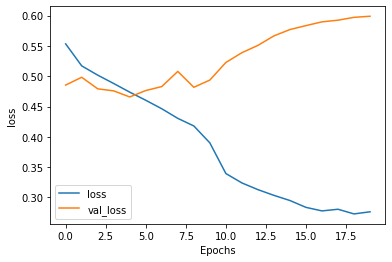

In [ ]:
plot_graphs(history_lstm, "accuracy")
plot_graphs(history_lstm, "loss")

In [ ]:
def calculate_results(y_true, y_pred):

  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred)
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [ ]:
y_preds = np.round(model_lstm.predict(X_val_padded))
results = calculate_results(y_true= y_val, y_pred=y_preds)
print(results)

40/40 [==============================] - 2s 9ms/step
{'accuracy': 0.7399209486166007, 'precision': 0.7369670689232232, 'recall': 0.7399209486166007, 'f1': 0.7382322493596772}


# GRU

In [ ]:
def gru_model(input_shape):
  X_indices = Input(input_shape)

  embeddings = embedding_layer(X_indices)

  X = GRU(128, return_sequences=True)(embeddings)

  X = Dropout(0.6)(X)

  #X = GRU(128, return_sequences=True)(X)

  #X = Dropout(0.6)(X)

  X = GRU(128)(X)

  X = Dense(32, activation="relu")(X)

  X = Dropout(0.5)(X)

  X = Dense(1, activation='sigmoid')(X)

  model = Model(inputs=X_indices, outputs=X)

  return model

In [ ]:
model_gru = gru_model((max_text_len,))
model_gru.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 66)]              0         
                                                                 
 embedding (Embedding)       (None, 66, 50)            500000    
                                                                 
 gru (GRU)                   (None, 66, 128)           69120     
                                                                 
 dropout (Dropout)           (None, 66, 128)           0         
                                                                 
 gru_1 (GRU)                 (None, 128)               99072     
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0     

In [ ]:
model_gru.compile(optimizer="adam",
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [ ]:
num_epochs = 50
history_gru = model_gru.fit(X_train_padded,
                    y_train,
                    epochs=num_epochs,
                    validation_data=(X_test_padded, y_test),
                    callbacks=[reduce_lr_acc, earlyStopping],
                    verbose=2)

Epoch 1/50
224/224 - 14s - loss: 0.6486 - accuracy: 0.6635 - val_loss: 0.6401 - val_accuracy: 0.6633 - lr: 0.0010 - 14s/epoch - 64ms/step
Epoch 2/50
224/224 - 2s - loss: 0.6442 - accuracy: 0.6636 - val_loss: 0.6393 - val_accuracy: 0.6633 - lr: 0.0010 - 2s/epoch - 8ms/step
Epoch 3/50
224/224 - 2s - loss: 0.6409 - accuracy: 0.6636 - val_loss: 0.6396 - val_accuracy: 0.6633 - lr: 0.0010 - 2s/epoch - 9ms/step
Epoch 4/50
224/224 - 2s - loss: 0.6419 - accuracy: 0.6636 - val_loss: 0.6397 - val_accuracy: 0.6633 - lr: 0.0010 - 2s/epoch - 8ms/step
Epoch 5/50
224/224 - 2s - loss: 0.6421 - accuracy: 0.6636 - val_loss: 0.6416 - val_accuracy: 0.6633 - lr: 0.0010 - 2s/epoch - 8ms/step
Epoch 6/50

Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
224/224 - 2s - loss: 0.6414 - accuracy: 0.6636 - val_loss: 0.6398 - val_accuracy: 0.6633 - lr: 0.0010 - 2s/epoch - 9ms/step
Epoch 7/50
224/224 - 3s - loss: 0.6419 - accuracy: 0.6636 - val_loss: 0.6390 - val_accuracy: 0.6633 - lr: 1.0

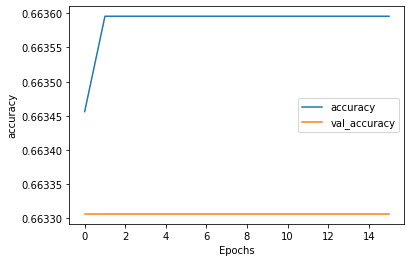

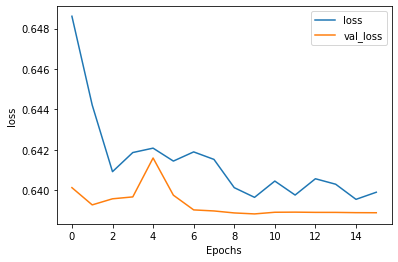

In [ ]:
plot_graphs(history_gru, "accuracy")
plot_graphs(history_gru, "loss")

In [ ]:
y_preds = np.round(model_gru.predict(X_val_padded))
results = calculate_results(y_true= y_val, y_pred=y_preds)
print(results)

40/40 [==============================] - 0s 5ms/step
{'accuracy': 0.6640316205533597, 'precision': 0.44093799309472104, 'recall': 0.6640316205533597, 'f1': 0.5299634786364106}


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# CNN

In [ ]:
def conv1d_model(input_shape):

  X_indices = Input(input_shape)

  embeddings = embedding_layer(X_indices)

  X = Conv1D(32,3,activation='relu')(embeddings)

  X = MaxPooling1D(3)(X)

  X = Conv1D(64,3,activation='relu')(X)

  X = GlobalMaxPooling1D()(X)

  X = Dense(128, activation='relu')(X)
  X = Dense(1, activation='sigmoid')(X)

  model = Model(inputs=X_indices, outputs=X)

  return model

In [ ]:
model_cnn = conv1d_model((max_text_len,))
model_cnn.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 66)]              0         
                                                                 
 embedding (Embedding)       (None, 66, 50)            500000    
                                                                 
 conv1d (Conv1D)             (None, 64, 32)            4832      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 21, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 19, 64)            6208      
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                            

In [ ]:
model_cnn.compile(optimizer="adam",
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [ ]:
num_epochs = 50
history_cnn = model_cnn.fit(X_train_padded,
                    y_train,
                    epochs=num_epochs,
                    validation_data=(X_test_padded, y_test),
                    callbacks=[earlyStopping, reduce_lr_acc],
                    verbose=2)

Epoch 1/50
224/224 - 9s - loss: 0.5915 - accuracy: 0.6979 - val_loss: 0.5531 - val_accuracy: 0.7325 - lr: 0.0010 - 9s/epoch - 38ms/step
Epoch 2/50
224/224 - 1s - loss: 0.5213 - accuracy: 0.7462 - val_loss: 0.5204 - val_accuracy: 0.7587 - lr: 0.0010 - 1s/epoch - 6ms/step
Epoch 3/50
224/224 - 1s - loss: 0.4823 - accuracy: 0.7714 - val_loss: 0.5064 - val_accuracy: 0.7574 - lr: 0.0010 - 1s/epoch - 5ms/step
Epoch 4/50
224/224 - 1s - loss: 0.4486 - accuracy: 0.7903 - val_loss: 0.5957 - val_accuracy: 0.7151 - lr: 0.0010 - 1s/epoch - 5ms/step
Epoch 5/50
224/224 - 1s - loss: 0.4156 - accuracy: 0.8169 - val_loss: 0.5301 - val_accuracy: 0.7534 - lr: 0.0010 - 1s/epoch - 4ms/step
Epoch 6/50
224/224 - 1s - loss: 0.3821 - accuracy: 0.8297 - val_loss: 0.5920 - val_accuracy: 0.7251 - lr: 0.0010 - 1s/epoch - 4ms/step
Epoch 7/50

Epoch 7: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
224/224 - 1s - loss: 0.3360 - accuracy: 0.8564 - val_loss: 0.5826 - val_accuracy: 0.7285 - lr: 0.001

In [ ]:
name="history_cnn.txt"
with open(name, 'w+') as f:
  for value in history_cnn.history["accuracy"]:
    f.write(str(value))
    f.write("\n")
  f.write("\n")
  for value in history_cnn.history["val_accuracy"]:
    f.write(str(value))
    f.write("\n")
  f.write("\n")
  for value in history_cnn.history["loss"]:
    f.write(str(value))
    f.write("\n")
  f.write("\n")
  for value in history_cnn.history["val_loss"]:
    f.write(str(value))
    f.write("\n")
  f.write("\n")

f.close()



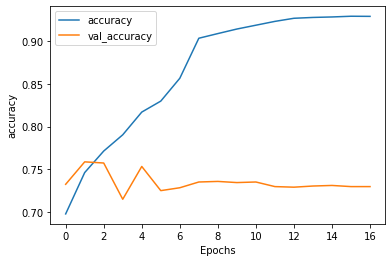

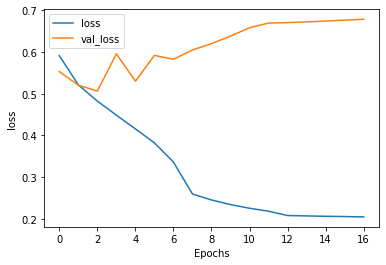

In [ ]:
plot_graphs(history_cnn, "accuracy")
plot_graphs(history_cnn, "loss")

In [ ]:
y_preds = np.round(model_cnn.predict(X_val_padded))
results = calculate_results(y_true= y_val, y_pred=y_preds)
print(results)

40/40 [==============================] - 0s 3ms/step
{'accuracy': 0.733596837944664, 'precision': 0.7331365837272226, 'recall': 0.733596837944664, 'f1': 0.7333624855554216}


# Mixed RCNN model

In [ ]:
def cnn_lstm_model(input_shape):

  X_indices = Input(input_shape)

  embeddings = embedding_layer(X_indices)

  X = Conv1D(8, 3, activation='relu')(embeddings)

  X = MaxPooling1D(3)(X)

  X = Conv1D(16, 3, activation='relu')(X)

  # X = MaxPooling1D(3)(X)

  # X = Conv1D(128, kernel_size, activation='relu')(X)

  # X = Dropout(0.6)(X)

  # X = MaxPooling1D(3)(X)

  # X = GlobalMaxPooling1D()(X)

  X = Bidirectional(LSTM(128, return_sequences=True))(X)

  X = Dropout(0.5)(X)

  # X = LSTM(units, return_sequences=True)(X)

  # X = Dropout(rate)(X)

  X = Bidirectional(LSTM(128))(X)

  X = Dropout(0.5)(X)

  X = Dense(32)(X)

  X = Dense(1, activation='sigmoid')(X)

  model = Model(inputs=X_indices, outputs=X)

  model.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

  return model

In [ ]:
model_cnn_lstm = cnn_lstm_model((max_text_len,))
model_cnn_lstm.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 66)]              0         
                                                                 
 embedding (Embedding)       (None, 66, 50)            500000    
                                                                 
 conv1d (Conv1D)             (None, 64, 8)             1208      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 21, 8)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 19, 16)            400       
                                                                 
 bidirectional (Bidirectiona  (None, 19, 256)          148480    
 l)                                                          

In [ ]:
model_cnn_lstm.compile(optimizer="adam",
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [ ]:
num_epochs = 50
history_cnn_lstm = model_cnn_lstm.fit(X_train_padded,
                    y_train,
                    epochs=num_epochs,
                    validation_data=(X_test_padded, y_test),
                    callbacks=[reduce_lr_acc, earlyStopping],
                    verbose=2)

Epoch 1/50
224/224 - 28s - loss: 0.6073 - accuracy: 0.6824 - val_loss: 0.5439 - val_accuracy: 0.7204 - lr: 0.0010 - 28s/epoch - 123ms/step
Epoch 2/50
224/224 - 3s - loss: 0.5595 - accuracy: 0.7186 - val_loss: 0.5376 - val_accuracy: 0.7392 - lr: 0.0010 - 3s/epoch - 11ms/step
Epoch 3/50
224/224 - 3s - loss: 0.5400 - accuracy: 0.7300 - val_loss: 0.5118 - val_accuracy: 0.7426 - lr: 0.0010 - 3s/epoch - 15ms/step
Epoch 4/50
224/224 - 3s - loss: 0.5254 - accuracy: 0.7425 - val_loss: 0.5151 - val_accuracy: 0.7372 - lr: 0.0010 - 3s/epoch - 12ms/step
Epoch 5/50
224/224 - 3s - loss: 0.5115 - accuracy: 0.7539 - val_loss: 0.5110 - val_accuracy: 0.7513 - lr: 0.0010 - 3s/epoch - 12ms/step
Epoch 6/50
224/224 - 3s - loss: 0.5006 - accuracy: 0.7585 - val_loss: 0.5117 - val_accuracy: 0.7527 - lr: 0.0010 - 3s/epoch - 11ms/step
Epoch 7/50
224/224 - 3s - loss: 0.4913 - accuracy: 0.7626 - val_loss: 0.5135 - val_accuracy: 0.7473 - lr: 0.0010 - 3s/epoch - 11ms/step
Epoch 8/50
224/224 - 4s - loss: 0.4803 - accu

In [ ]:
name="history_cnn_lstm.txt"
with open(name, 'w+') as f:
  for value in history_cnn_lstm.history["accuracy"]:
    f.write(str(value))
    f.write("\n")
  f.write("\n")
  for value in history_cnn_lstm.history["val_accuracy"]:
    f.write(str(value))
    f.write("\n")
  f.write("\n")
  for value in history_cnn_lstm.history["loss"]:
    f.write(str(value))
    f.write("\n")
  f.write("\n")
  for value in history_cnn_lstm.history["val_loss"]:
    f.write(str(value))
    f.write("\n")
  f.write("\n")

f.close()



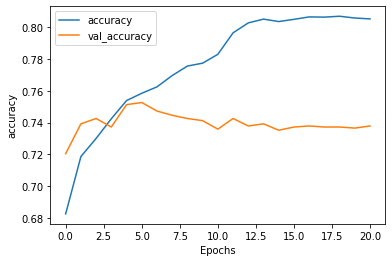

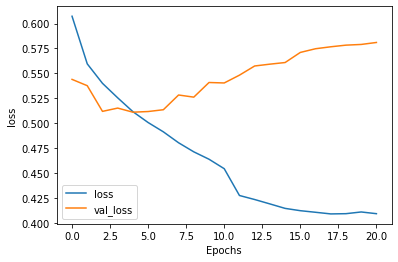

In [ ]:
plot_graphs(history_cnn_lstm, "accuracy")
plot_graphs(history_cnn_lstm, "loss")

In [ ]:
y_preds = np.round(model_cnn_lstm.predict(X_val_padded))
results = calculate_results(y_true= y_val, y_pred=y_preds)
print(results)

40/40 [==============================] - 0s 5ms/step
{'accuracy': 0.7256916996047431, 'precision': 0.7196727973091792, 'recall': 0.7256916996047431, 'f1': 0.7218064934263719}


# Random Over Sampling the Imbalanced Dataset


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [ ]:
Counter(y_train)

Counter({0: 4970, 1: 2467})

In [ ]:
ROS = RandomOverSampler(sampling_strategy=1)

In [ ]:
X_train_np = np.array(X_train)
X_train_reshaped = X_train_np.reshape(-1, 1)
print(X_train_reshaped[:5])

[['saw 3 idiots   refreshing  even though appered commentary  education system   however  painted fairly black n white picture      entertainment']
 ['watching basketball giving heartburn']
 [' tickets saturday spartan wallop  propname  mail  tomorrow   anyone want go see u2']
 ['crowd surfed  propname   propname   ']
 ['congratulations  propname  new baby']]


In [ ]:
y_train_np = np.array(y_train)
y_train_reshaped = y_train_np.reshape(-1, 1)
print(y_train_reshaped[:5])

[[0]
 [0]
 [1]
 [0]
 [0]]


In [ ]:
X_train_ros, y_train_ros = ROS.fit_resample(X_train_reshaped, y_train_reshaped)

In [ ]:
Counter(y_train_ros)

Counter({0: 4970, 1: 4970})

In [ ]:
print(X_train_ros, y_train_ros)

[['saw 3 idiots   refreshing  even though appered commentary  education system   however  painted fairly black n white picture      entertainment']
 ['watching basketball giving heartburn']
 [' tickets saturday spartan wallop  propname  mail  tomorrow   anyone want go see u2']
 ...
 ['drowsy still    least managed get 8 hours sleep last night    rarity days']
 ['still awake 3 30   oh']
 ['take much shopping  drinking  going dinners  hanging playing babies  flying random cities   hurry half marathon  soon get real travel']] [0 0 1 ... 1 1 1]


In [ ]:
X_train_ros_np = np.array(X_train_ros)
X_train_ros_reshaped = X_train_ros_np.reshape(1, len(X_train_ros))
print(X_train_ros_reshaped)

[['saw 3 idiots   refreshing  even though appered commentary  education system   however  painted fairly black n white picture      entertainment'
  'watching basketball giving heartburn'
  ' tickets saturday spartan wallop  propname  mail  tomorrow   anyone want go see u2'
  ...
  'drowsy still    least managed get 8 hours sleep last night    rarity days'
  'still awake 3 30   oh'
  'take much shopping  drinking  going dinners  hanging playing babies  flying random cities   hurry half marathon  soon get real travel']]


In [ ]:
y_train_ros_np = np.array(y_train_ros)
y_train_ros_reshaped = y_train_ros_np.reshape(1, len(y_train_ros))
print(y_train_ros_reshaped)

[[0 0 1 ... 1 1 1]]


In [ ]:
X_train_ros_list = list(X_train_ros_reshaped[0])
y_train_ros_list = list(y_train_ros_reshaped[0])

In [ ]:
# X_test_temp = X_test.tolist()
# y_test_temp = y_test.tolist()

In [ ]:
# X_full = X_train_ros_list + X_test_temp
# y_full = y_train_ros_list + y_test_temp

In [ ]:
# d = {'text': X_full, 'class': y_full}

In [ ]:
# new_df = pd.DataFrame(d, columns=["text", "class"])
# new_df

,text,class
0,surprised propane propane engaged found perez,0
1,mexico city legalized gay marriage adoptions,0
2,wishing saturday,0
3,feeling odd,1
4,great time deal county fair concert fun farm a...,1
...,...,...
12329,starting feel like old self,0
12330,slept much last night,0
12331,earlier tonight found picture waldo jail think...,1
12332,wistfully working,0


In [ ]:
# new_df.to_csv("preprocessed random sampling.csv")

# Defining Baseline Model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [ ]:
model_baseline = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

In [ ]:
model_baseline.fit(X_train_ros_list, y_train_ros)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:

def calculate_results(y_true, y_pred):

  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [ ]:
baseline_preds = model_baseline.predict(X_test)
baseline_preds[:20]

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1])

In [ ]:
baseline_results = calculate_results(y_true=y_test,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 67.74193548387096,
 'precision': 0.7280802475454109,
 'recall': 0.6774193548387096,
 'f1': 0.6847079895609928}

# Text Preprocessing on Oversampled Dataset

In [ ]:
new_tokenizer = Tokenizer(num_words = vocab_size,
                      oov_token = oov_tok)

In [ ]:
new_tokenizer.fit_on_texts(X_train_ros_list)

new_words_to_index = new_tokenizer.word_index
print(dict(list(new_words_to_index.items())[:10]))
print(len(new_words_to_index))

{'<OOV>': 1, 'propname': 2, 'day': 3, 'going': 4, 'get': 5, 'like': 6, 'back': 7, 'one': 8, 'time': 9, 'work': 10}
12905


In [ ]:
X_train_sequences_ros = tokenizer.texts_to_sequences(X_train_ros_list)
X_train_padded_ros = pad_sequences(X_train_sequences_ros,
                                maxlen=max_length,
                                padding=padding_type,
                                truncating = trunc_type)


# Oversampled Dataset on LSTM

In [ ]:
model_lstm_ros = lstm_model((max_text_len,))
model_lstm_ros.compile(optimizer=adam,
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [ ]:
num_epochs = 140
history_lstm_ros = model_lstm_ros.fit(X_train_padded_ros,
                    y_train_ros,
                    epochs=num_epochs,
                    validation_split=0.2,
                    #callbacks=[reduce_lr_acc],
                    verbose=2)

Epoch 1/140
249/249 - 9s - loss: 0.6546 - accuracy: 0.6281 - val_loss: 0.9137 - val_accuracy: 0.2399 - 9s/epoch - 38ms/step
Epoch 2/140
249/249 - 4s - loss: 0.5807 - accuracy: 0.6987 - val_loss: 0.8306 - val_accuracy: 0.5055 - 4s/epoch - 17ms/step
Epoch 3/140
249/249 - 4s - loss: 0.5629 - accuracy: 0.7165 - val_loss: 0.8172 - val_accuracy: 0.5573 - 4s/epoch - 17ms/step
Epoch 4/140
249/249 - 4s - loss: 0.5528 - accuracy: 0.7203 - val_loss: 0.7927 - val_accuracy: 0.5568 - 4s/epoch - 17ms/step
Epoch 5/140
249/249 - 4s - loss: 0.5466 - accuracy: 0.7269 - val_loss: 0.7490 - val_accuracy: 0.6232 - 4s/epoch - 17ms/step
Epoch 6/140
249/249 - 4s - loss: 0.5407 - accuracy: 0.7303 - val_loss: 0.8290 - val_accuracy: 0.5584 - 4s/epoch - 17ms/step
Epoch 7/140
249/249 - 4s - loss: 0.5378 - accuracy: 0.7348 - val_loss: 0.7774 - val_accuracy: 0.5946 - 4s/epoch - 17ms/step
Epoch 8/140
249/249 - 4s - loss: 0.5336 - accuracy: 0.7386 - val_loss: 0.8860 - val_accuracy: 0.4995 - 4s/epoch - 17ms/step
Epoch 9/

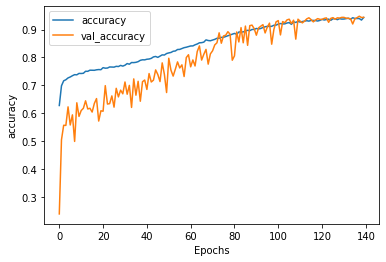

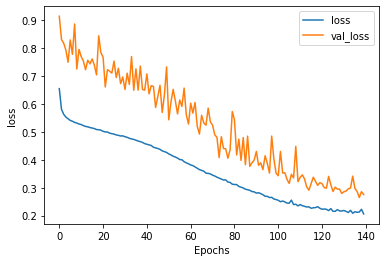

In [ ]:
plot_graphs(history_lstm_ros, "accuracy")
plot_graphs(history_lstm_ros, "loss")

In [ ]:
pred_prob = model_lstm_ros.predict(X_test_padded)
pred_round = [int( i > 0.5) for i in pred_prob]
print(len(y_test))
print(accuracy_score(pred_round, y_test))

78/78 [==============================] - 1s 7ms/step
2480
0.7322580645161291


# CNN on Oversampled dataset

In [ ]:
model_cnn_ros = conv1d_model((max_text_len,))
model_cnn_ros.compile(optimizer=adam,
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [ ]:
num_epochs = 70
history_cnn_ros = model_cnn_ros.fit(X_train_padded_ros,
                    y_train_ros,
                    epochs=num_epochs,
                    validation_split=0.2,
                    #callbacks=[earlyStopping, reduce_lr_acc],
                    verbose=2)

Epoch 1/70
249/249 - 2s - loss: 0.6760 - accuracy: 0.6158 - val_loss: 0.8325 - val_accuracy: 0.0146 - 2s/epoch - 10ms/step
Epoch 2/70
249/249 - 1s - loss: 0.6583 - accuracy: 0.6308 - val_loss: 0.8370 - val_accuracy: 0.0855 - 1s/epoch - 6ms/step
Epoch 3/70
249/249 - 2s - loss: 0.6429 - accuracy: 0.6415 - val_loss: 0.8049 - val_accuracy: 0.2243 - 2s/epoch - 6ms/step
Epoch 4/70
249/249 - 1s - loss: 0.6278 - accuracy: 0.6591 - val_loss: 0.8218 - val_accuracy: 0.2475 - 1s/epoch - 6ms/step
Epoch 5/70
249/249 - 2s - loss: 0.6127 - accuracy: 0.6729 - val_loss: 0.7935 - val_accuracy: 0.3270 - 2s/epoch - 6ms/step
Epoch 6/70
249/249 - 2s - loss: 0.5988 - accuracy: 0.6847 - val_loss: 0.7614 - val_accuracy: 0.4125 - 2s/epoch - 6ms/step
Epoch 7/70
249/249 - 2s - loss: 0.5842 - accuracy: 0.6978 - val_loss: 0.6947 - val_accuracy: 0.5226 - 2s/epoch - 6ms/step
Epoch 8/70
249/249 - 2s - loss: 0.5729 - accuracy: 0.7086 - val_loss: 0.6851 - val_accuracy: 0.5433 - 2s/epoch - 6ms/step
Epoch 9/70
249/249 - 2s

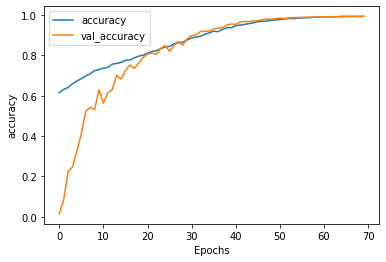

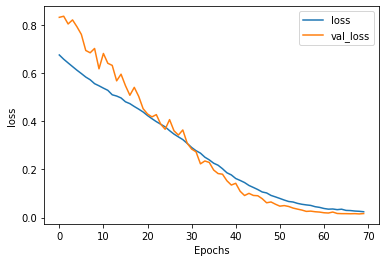

In [ ]:
plot_graphs(history_cnn_ros, "accuracy")
plot_graphs(history_cnn_ros, "loss")

In [ ]:
pred_prob = model_cnn_ros.predict(X_test_padded)
pred_round = [int( i >= 0.5) for i in pred_prob]
print(len(y_test))
print(accuracy_score(pred_round, y_test))

78/78 [==============================] - 0s 3ms/step
2480
0.7379032258064516


# RCNN on ROS Dataset

In [ ]:
model_cnn_lstm_ros = cnn_lstm_model((max_text_len,))
model_cnn_lstm_ros.compile(optimizer=adam,
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [ ]:
num_epochs = 20
history_cnn_lstm_ros = model_cnn_lstm_ros.fit(X_train_padded_ros,
                    y_train_ros,
                    epochs=num_epochs,
                    validation_split=0.2,
                    #callbacks=[earlyStopping, reduce_lr_acc],
                    verbose=2)

Epoch 1/20
249/249 - 6s - loss: 0.6122 - accuracy: 0.6754 - val_loss: 0.6276 - val_accuracy: 0.7057 - 6s/epoch - 23ms/step
Epoch 2/20
249/249 - 2s - loss: 0.5114 - accuracy: 0.7632 - val_loss: 0.6756 - val_accuracy: 0.6801 - 2s/epoch - 8ms/step
Epoch 3/20
249/249 - 2s - loss: 0.4199 - accuracy: 0.8286 - val_loss: 0.4318 - val_accuracy: 0.8405 - 2s/epoch - 8ms/step
Epoch 4/20
249/249 - 2s - loss: 0.3073 - accuracy: 0.8908 - val_loss: 0.2984 - val_accuracy: 0.9069 - 2s/epoch - 8ms/step
Epoch 5/20
249/249 - 2s - loss: 0.1898 - accuracy: 0.9433 - val_loss: 0.2581 - val_accuracy: 0.9059 - 2s/epoch - 8ms/step
Epoch 6/20
249/249 - 2s - loss: 0.1398 - accuracy: 0.9609 - val_loss: 0.1433 - val_accuracy: 0.9603 - 2s/epoch - 8ms/step
Epoch 7/20
249/249 - 2s - loss: 0.1030 - accuracy: 0.9751 - val_loss: 0.1073 - val_accuracy: 0.9713 - 2s/epoch - 8ms/step
Epoch 8/20
249/249 - 2s - loss: 0.0908 - accuracy: 0.9769 - val_loss: 0.0831 - val_accuracy: 0.9774 - 2s/epoch - 8ms/step
Epoch 9/20
249/249 - 2s

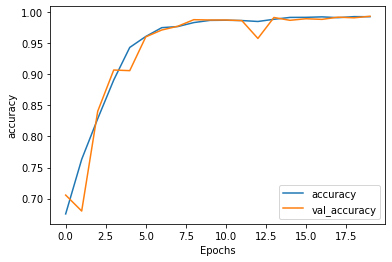

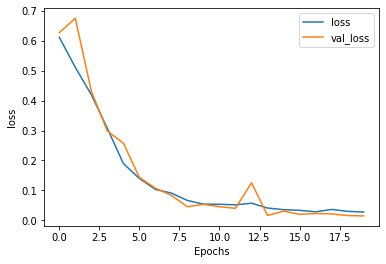

In [ ]:
plot_graphs(history_cnn_lstm_ros, "accuracy")
plot_graphs(history_cnn_lstm_ros, "loss")

# Hypertuning Optimization for LSTM

In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
def create_lstm_model(input_shape, units, rate):

  X_indices = Input(input_shape)

  embeddings = embedding_layer(X_indices)

  X = LSTM(units, return_sequences=True)(embeddings)

  X = Dropout(rate)(X)

  X = LSTM(units, return_sequences=True)(X)

  X = Dropout(rate)(X)

  X = LSTM(units)(X)

  X = Dense(1, activation='sigmoid')(X)

  model = Model(inputs=X_indices, outputs=X)

  model.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

  return model

In [ ]:
model_lstm = KerasClassifier(create_lstm_model,
                        epochs=50,
                        verbose=1,
                        input_shape=(max_text_len,),
                        validation_split=0.2,
                        callbacks=[earlyStopping]
                        )

In [ ]:
# model.fit(X_train_padded, y_train)
# y_proba = model.predict_proba(X_train_padded)

In [ ]:
param_grid_lstm = dict(
    model__units = [256, 128, 64],
    model__rate = [0.5, 0.6, 0.7, 0.8]
)

In [ ]:
grid_lstm = RandomizedSearchCV(model_lstm, param_grid_lstm, cv=4, verbose=1, n_iter=5, scoring="accuracy")

In [ ]:
# X_train_padded = np.array(X_train_padded)
# y_train = np.array(y_train)
# X_train_padded.shape, y_train.shape

In [ ]:
grid_result_lstm = grid_lstm.fit(X_total_padded, y_total)

Fitting 4 folds for each of 5 candidates, totalling 20 fits
Epoch 1/50
186/186 [==============================] - 13s 47ms/step - loss: 0.6095 - accuracy: 0.6860 - val_loss: 0.5639 - val_accuracy: 0.7036
Epoch 2/50
186/186 [==============================] - 3s 15ms/step - loss: 0.5405 - accuracy: 0.7383 - val_loss: 0.5477 - val_accuracy: 0.7339
Epoch 3/50
186/186 [==============================] - 3s 14ms/step - loss: 0.5118 - accuracy: 0.7615 - val_loss: 0.5614 - val_accuracy: 0.7171
Epoch 4/50
186/186 [==============================] - 3s 14ms/step - loss: 0.4996 - accuracy: 0.7714 - val_loss: 0.5401 - val_accuracy: 0.7332
Epoch 5/50
186/186 [==============================] - 3s 14ms/step - loss: 0.4758 - accuracy: 0.7860 - val_loss: 0.5636 - val_accuracy: 0.7379
Epoch 6/50
186/186 [==============================] - 3s 14ms/step - loss: 0.4607 - accuracy: 0.7964 - val_loss: 0.5590 - val_accuracy: 0.7332
Epoch 7/50
186/186 [==============================] - 3s 14ms/step - loss: 0.4423

In [ ]:
print(grid_lstm.best_score_, grid_lstm.best_params_)

0.7236040807297428 {'model__units': 64, 'model__rate': 0.6}


# Hypertuning Optimization for CNN

In [ ]:
def create_conv1d_model(input_shape, filters, kernel_size):

  X_indices = Input(input_shape)

  embeddings = embedding_layer(X_indices)

  X = Conv1D(filters*4, kernel_size, activation='relu')(embeddings)

  X = MaxPooling1D(3)(X)

  X = Conv1D(filters*2, kernel_size, activation='relu')(X)

  X = MaxPooling1D(3)(X)

  X = Conv1D(filters, kernel_size, activation='relu')(X)
  X = Dropout(0.8)(X)
  X = MaxPooling1D(3)(X)

  X = GlobalMaxPooling1D()(X)

  X = Dense(filters, activation='relu')(X)
  X = Dense(1, activation='sigmoid')(X)

  model = Model(inputs=X_indices, outputs=X)

  model.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

  return model

In [ ]:
import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [ ]:
model_cnn = KerasClassifier(create_conv1d_model,
                        epochs=50,
                        verbose=1,
                        input_shape=(max_text_len,),
                        validation_split=0.2,
                        callbacks=[earlyStopping, tensorboard_callback]
                        )

In [ ]:
param_grid_cnn = dict(
    model__filters = [256, 128],
    model__kernel_size = [3, 5, 7]
)

In [ ]:
grid_cnn = RandomizedSearchCV(model_cnn, param_grid_cnn, cv=4, verbose=1, n_iter=5, scoring="accuracy")

In [ ]:
grid_result_cnn = grid_cnn.fit(X_total_padded, y_total)

Fitting 4 folds for each of 5 candidates, totalling 20 fits
Epoch 1/50
186/186 [==============================] - 3s 12ms/step - loss: 0.6188 - accuracy: 0.6776 - val_loss: 0.5831 - val_accuracy: 0.7097
Epoch 2/50
186/186 [==============================] - 2s 10ms/step - loss: 0.5301 - accuracy: 0.7432 - val_loss: 0.5459 - val_accuracy: 0.7426
Epoch 3/50
186/186 [==============================] - 2s 10ms/step - loss: 0.4352 - accuracy: 0.8023 - val_loss: 0.5473 - val_accuracy: 0.7339
Epoch 4/50
186/186 [==============================] - 2s 10ms/step - loss: 0.3200 - accuracy: 0.8670 - val_loss: 0.6102 - val_accuracy: 0.6956
Epoch 5/50
186/186 [==============================] - 2s 10ms/step - loss: 0.2138 - accuracy: 0.9210 - val_loss: 0.6652 - val_accuracy: 0.6956
Epoch 6/50
186/186 [==============================] - 2s 10ms/step - loss: 0.1538 - accuracy: 0.9430 - val_loss: 0.7498 - val_accuracy: 0.7137
Epoch 7/50
186/186 [==============================] - 2s 10ms/step - loss: 0.1279 

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
12 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/scikeras/wrappers.py", line 1494, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/scikeras/wrappers.py", line 762, in fit
    self._fit(
  File "/usr/local/lib/python3.8/dist-packages/scikeras/wrappers

248/248 [==============================] - 4s 15ms/step - loss: 0.6100 - accuracy: 0.6922 - val_loss: 0.5398 - val_accuracy: 0.7394
Epoch 2/50
248/248 [==============================] - 3s 14ms/step - loss: 0.5071 - accuracy: 0.7601 - val_loss: 0.5539 - val_accuracy: 0.7560
Epoch 3/50
248/248 [==============================] - 4s 15ms/step - loss: 0.4166 - accuracy: 0.8170 - val_loss: 0.5752 - val_accuracy: 0.7258
Epoch 4/50
248/248 [==============================] - 4s 14ms/step - loss: 0.3028 - accuracy: 0.8721 - val_loss: 0.5613 - val_accuracy: 0.7399
Epoch 5/50
248/248 [==============================] - 4s 15ms/step - loss: 0.2063 - accuracy: 0.9203 - val_loss: 0.6629 - val_accuracy: 0.7374
Epoch 6/50
248/248 [==============================] - 4s 15ms/step - loss: 0.1532 - accuracy: 0.9424 - val_loss: 0.6809 - val_accuracy: 0.7293
Epoch 7/50
248/248 [==============================] - 4s 15ms/step - loss: 0.1212 - accuracy: 0.9588 - val_loss: 0.7601 - val_accuracy: 0.7339
Epoch 8/50

In [ ]:
print(grid_cnn.best_score_, grid_cnn.best_params_)

0.7129180275605407 {'model__kernel_size': 3, 'model__filters': 128}


# GRU

In [ ]:
def create_gru_model(input_shape, units, rate):
  X_indices = Input(input_shape)

  embeddings = embedding_layer(X_indices)

  X = GRU(units, return_sequences=True)(embeddings)

  X = Dropout(rate)(X)

  #X = GRU(128, return_sequences=True)(X)

  #X = Dropout(0.6)(X)

  X = GRU(units)(X)

  X = Dense(32, activation="relu")(X)

  X = Dropout(rate)(X)

  X = Dense(1, activation='sigmoid')(X)

  model = Model(inputs=X_indices, outputs=X)

  model.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

  return model

In [ ]:
model_gru = KerasClassifier(create_gru_model,
                        epochs=50,
                        verbose=1,
                        input_shape=(max_text_len,),
                        validation_split=0.2,
                        callbacks=[reduce_lr_acc, earlyStopping]
                        )

In [ ]:
param_grid_gru = dict(
    model__units = [128, 64, 32],
    model__rate = [0.5, 0.6, 0.7, 0.8]
)

In [ ]:
grid_gru = RandomizedSearchCV(model_gru, param_grid_gru, cv=4, verbose=1, n_iter=5, scoring="accuracy")

In [ ]:
grid_result_gru = grid_gru.fit(X_train_padded, y_train)

Fitting 4 folds for each of 5 candidates, totalling 20 fits
Epoch 1/50
135/135 [==============================] - 18s 34ms/step - loss: 0.6551 - accuracy: 0.6584 - val_loss: 0.6317 - val_accuracy: 0.6809 - lr: 0.0010
Epoch 2/50
135/135 [==============================] - 2s 11ms/step - loss: 0.6451 - accuracy: 0.6591 - val_loss: 0.6334 - val_accuracy: 0.6809 - lr: 0.0010
Epoch 3/50
135/135 [==============================] - 2s 14ms/step - loss: 0.6477 - accuracy: 0.6591 - val_loss: 0.6273 - val_accuracy: 0.6809 - lr: 0.0010
Epoch 4/50
135/135 [==============================] - 2s 16ms/step - loss: 0.6466 - accuracy: 0.6591 - val_loss: 0.6300 - val_accuracy: 0.6809 - lr: 0.0010
Epoch 5/50
135/135 [==============================] - 2s 13ms/step - loss: 0.6501 - accuracy: 0.6591 - val_loss: 0.6305 - val_accuracy: 0.6809 - lr: 0.0010
Epoch 6/50
132/135 [============================>.] - ETA: 0s - loss: 0.6465 - accuracy: 0.6605
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000

In [ ]:
print(grid_gru.best_score_, grid_gru.best_params_)

0.6635957565605807 {'model__units': 128, 'model__rate': 0.6}
